In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pandas as pd


df = pd.read_csv('./data/re_data2021.csv')
df

,title,text,date,f_text,re_title,re_date,re_text
0,Fracturing device,"A fracturing device includes a power unit, and...",Priority 2021-01-26 • Filed 2021-02-10 • Grant...,"A fracturing device includes a power unit, and...",fracturing device,2021-01-26,fracturing device power unit power unit muffli...
1,Systems and methods for using shared user inve...,Systems and methods for using shared user inve...,Priority 2021-01-05 • Filed 2021-01-05 • Grant...,Systems and methods for using shared user inve...,systems shared user inventory information init...,2021-01-05,systems shared user inventory information init...
2,Systems and methods for peer-to-peer exchanges...,Systems and methods for facilitating peer-to-p...,Priority 2021-01-05 • Filed 2021-01-05 • Grant...,Systems and methods for facilitating peer-to-p...,systems peertopeer exchanges nonfungible digit...,2021-01-05,systems facilitating peertopeer exchanges digi...
3,Cluster diagnostics data for distributed job e...,A shared database platform can interface with ...,Priority 2021-01-12 • Filed 2021-01-29 • Grant...,A shared database platform can interface with ...,cluster diagnostics data distributed job execu...,2021-01-12,shared database platform interface cluster com...
4,Method and system for federated learning,"Methods, systems, and apparatuses, including c...",Priority 2021-01-28 • Filed 2021-01-28 • Publi...,"Methods, systems, and apparatuses, including c...",system federated learning,2021-01-28,systems apparatuses computer programs encoded ...
...,...,...,...,...,...,...,...
2616,Apparatus and system for turning and positioni...,A system for use with a bed having a frame and...,Filed 2022-01-03 • Published 2022-04-21,A system for use with a bed having a frame and...,apparatus system turning positioning patient,2022-01-03,system use bed frame supporting surface sheet ...
2617,System and method for trading and tracking dig...,A method of managing a plurality of unique dig...,Filed 2022-01-03 • Published 2022-04-21,A method of managing a plurality of unique dig...,system trading tracking digitized coupons,2022-01-03,managing plurality unique digital coupons tran...
2618,Deployable radiation shield cover,A radiation shield cover for covering a radiat...,Filed 2022-01-03 • Published 2022-04-21,A radiation shield cover for covering a radiat...,deployable radiation shield cover,2022-01-03,radiation shield cover covering radiation shie...
2619,Network load management methods and apparatus,A Narrow Band-Internet of Things (NB-IoT) comm...,Filed 2022-01-03 • Published 2022-04-21,A Narrow Band-Internet of Things (NB-IoT) comm...,network load management apparatus,2022-01-03,narrow bandinternet things nbiot communication...


In [11]:
for text in df['re_text']:
    words = text.split(' ')
    for w in words:
        if w == 'The':
            print(text)


In [12]:
n_components=4
max_iter=20
learning_offset=1.0

vectorizer = CountVectorizer(max_df=0.9, min_df=2)
model = LatentDirichletAllocation(n_components=n_components, max_iter=max_iter,
                                   # learning_method='online',
                                   learning_offset=learning_offset,
                                   random_state=0, )

In [13]:
print(df['re_text'][0])
vec = vectorizer.fit_transform(df['re_text'])


fracturing device power unit power unit muffling compartment turbine engine air intake unit cleaner air intake unit communicated turbine engine intake pipe configured provide combustionsupporting gas turbine engine cleaner configured clean turbine engine air intake unit top muffling compartment muffling compartment accommodation space turbine engine cleaner within accommodation space cleaner side turbine engine away air intake unit


In [11]:
vectorizer.get_feature_names()


C:\Users\jyw10\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['aav',
 'abdomen',
 'abilities',
 'ability',
 'ablation',
 'able',
 'abnormal',
 'absence',
 'absent',
 'absolute',
 'absorb',
 'absorbed',
 'absorbent',
 'absorber',
 'absorbing',
 'absorption',
 'abundance',
 'abundant',
 'abundantly',
 'abut',
 'abutment',
 'abuts',
 'abutting',
 'ac',
 'accelerate',
 'accelerating',
 'acceleration',
 'accelerator',
 'accelerometer',
 'accent',
 'accept',
 'acceptable',
 'acceptance',
 'accepted',
 'access',
 'accessed',
 'accesses',
 'accessible',
 'accessing',
 'accessories',
 'accessory',
 'accident',
 'accidentally',
 'accommodate',
 'accommodated',
 'accommodating',
 'accommodation',
 'accordance',
 'according',
 'accordingly',
 'account',
 'accounts',
 'accumulated',
 'accumulating',
 'accumulation',
 'accumulator',
 'accuracy',
 'accurate',
 'accurately',
 'achieve',
 'achieved',
 'achieves',
 'achieving',
 'acid',
 'acids',
 'acoustic',
 'acquire',
 'acquired',
 'acquires',
 'acquiring',
 'acquisition',
 'across',
 'act',
 'acting',
 'actio

In [14]:
import pyLDAvis
import pyLDAvis.sklearn

model.fit(vec)
pl = pyLDAvis.sklearn.prepare(model, vec, vectorizer, sort_topics=False)
pyLDAvis.enable_notebook()
pyLDAvis.save_html(pl, './result/lda_result_2021.html')
pyLDAvis.display(pl)


C:\Users\jyw10\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\jyw10\AppData\Local\Programs\Python\Python310\lib\site-packages\pyLDAvis\_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  by='saliency', ascending=False).head(R).drop('saliency', 1)


In [ ]:

from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import matplotlib

# font_path = "./gulim.ttc"
# self.font = font_manager.FontProperties(fname=font_path).get_name()
# rc('font', family=self.font)

def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(4, 3, figsize=(30, 50),sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()
    
tf_feature_names = vectorizer.get_feature_names()
plot_top_words(model, tf_feature_names, 30, 'Topics in LDA model')

In [15]:
lda_df = pd.DataFrame()
topn = 50
feature_names = vectorizer.get_feature_names()
for topic_idx, topic in enumerate(model.components_):
    top_features_ind = topic.argsort()[:-topn - 1:-1]
    top_features = [feature_names[i] for i in top_features_ind]
    weights = topic[top_features_ind]
    lda_df['topic{} key'.format(topic_idx+1)] = top_features
    lda_df['topic{} val'.format(topic_idx+1)] = weights
    lda_df.to_excel('./result/lda_total_keyword_2021.xlsx', index=False)

C:\Users\jyw10\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [9]:
import numpy as np
np.set_printoptions(threshold = np.inf)
vec = vectorizer.fit_transform(df['re_text'])
x = vec.toarray()
print(x[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [10]:
import pyLDAvis
import pyLDAvis.sklearn

model.fit(vec)
pl = pyLDAvis.sklearn.prepare(model, vec, vectorizer, sort_topics=False)
pyLDAvis.enable_notebook()
pyLDAvis.save_html(pl, './result/lda_result.html')
pyLDAvis.display(pl)


C:\Users\jyw10\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\jyw10\AppData\Local\Programs\Python\Python310\lib\site-packages\pyLDAvis\_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  by='saliency', ascending=False).head(R).drop('saliency', 1)


C:\Users\jyw10\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


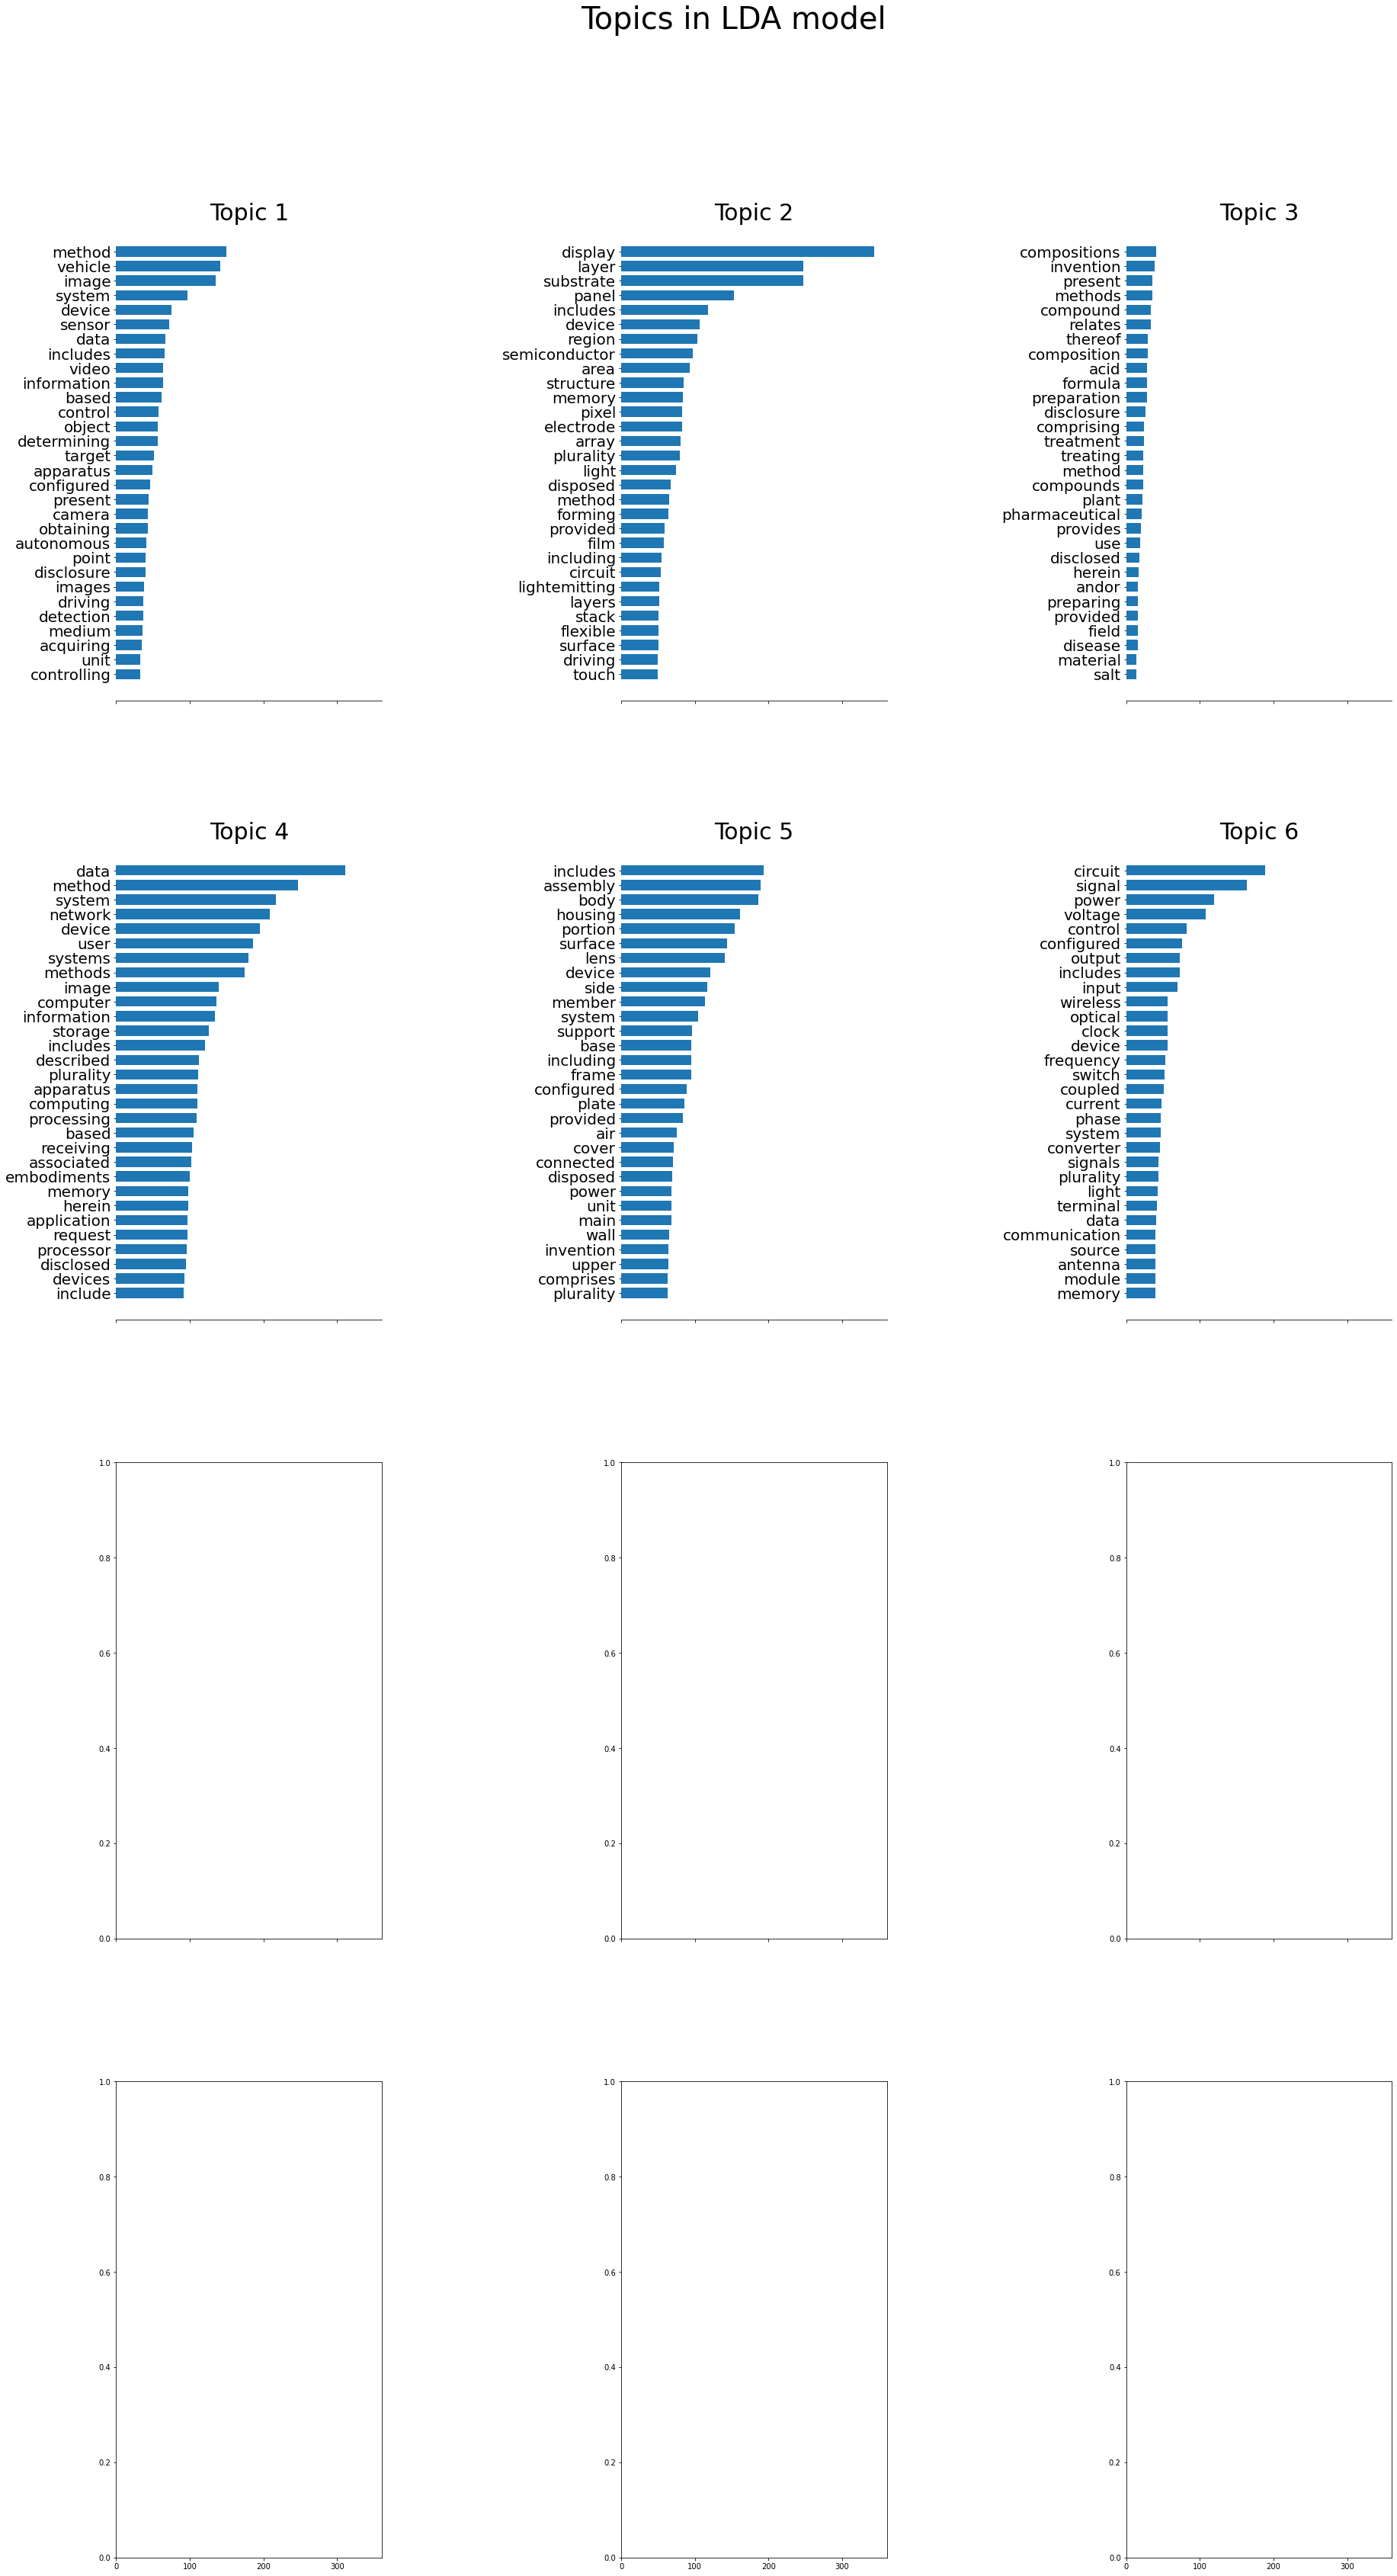

In [11]:
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import matplotlib

# font_path = "./gulim.ttc"
# self.font = font_manager.FontProperties(fname=font_path).get_name()
# rc('font', family=self.font)

def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(4, 3, figsize=(30, 50),sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()
    
tf_feature_names = vectorizer.get_feature_names()
plot_top_words(model, tf_feature_names, 30, 'Topics in LDA model')

In [12]:
import pyLDAvis
import pyLDAvis.sklearn

model.fit(vec)
pl = pyLDAvis.sklearn.prepare(model, vec, vectorizer, sort_topics=False)
pyLDAvis.enable_notebook()
pyLDAvis.save_html(pl, './result/lda_result2.html')
pyLDAvis.display(pl)

C:\Users\jyw10\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\jyw10\AppData\Local\Programs\Python\Python310\lib\site-packages\pyLDAvis\_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  by='saliency', ascending=False).head(R).drop('saliency', 1)
